# Pertemuan 4

Nama : Ferli Malkan Amien <br>
NPM  : 2117051050 <br>
Kelas: C <br>
Link : https://colab.research.google.com/drive/1nbGrr-YbJdMLflLAT7uz0CJ9769pwOf8?usp=sharing

## Library

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Dataset

In [ ]:
# buat data tabular seperti di bawah ini
df = pd.DataFrame(
    {
        "ID Buah" : pd.Series([1, 2, 3, 4, 5]),
        "Diameter" : pd.Series([7.0, 7.1, 6.5, 6.6, 6.8]),
        "Berat" : pd.Series([165, 170, 180, 195, 200]),
    }
)

In [ ]:
df

,ID Buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


## Algoritma K-Means

In [ ]:
# pemilihan feature
df_train = df.drop("ID Buah", axis=1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [ ]:
# fitting / predict / labeling berdasarkan jumlah kluster (n = 2)
n = 2
kmeans_model = KMeans(n_clusters = n, n_init = 1, random_state = 100).fit(df_train)

In [ ]:
# pelebelan cluster
df["kluster"] = kmeans_model.labels_
df

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


In [ ]:
# hasil dari update centroid
print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


### Tantangan dari algorima K-Means
Limitasi atau tantangan dari algoritma k-means adalah menentukan nilai centroid diawal dan jumlah kluster yang manual, sehingga mekanisme/metode tertentu untuk memilih centroid di awal dan jumlah kluster

#### Pemilihan centroid awal

*   Menggunakan pengaturan parameter yang ada di sklearn
*   Lebih lengkapnya bisa baca di dokumentasinya https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html



In [ ]:
# n_cluster merupakan parameter dari jumlah cluster/kelompok yang harus ditentukan
# nilai n_cluster tergantung data, atau bisa berdasarkan metode elbow, dll, defaultnya 8 atau ketika tidak diisi jumlah cluser = 8
# n_init merupakan parameter untuk menentukan berapa kali algoritma k-means dijalankan dengan centroid seed yang berbeda
# nilai n_init bisa 1 atau lebih dari 1, defaultnya 10/auto
# random_state merupakan parameter untuk menentukan angka acak sebagai inisialisasi centroid
# nilai random_state diisi dengan nilai deterministik (0-100), defaultnya None)

# atur parameter untuk kmeans_model_2 ini sehingga berbeda dengan parameter kmeans_model sebelumnya
kmeans_model_2 = KMeans(n_clusters=2, n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"] = kmeans_model_2.labels_
df2

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,0
3,4,6.6,195,1
4,5,6.8,200,1


**Lihat, Hasil labeling cluster berbeda ketika parameter berbeda**

#### Pemilihan jumlah kluster

*   Menggunakan metode elbow
*   Librarynya bisa apa saja, contoh di sini menggunakan library sckit yellowbrick cluster https://www.scikit-yb.org/en/lastest/api/cluster/elbow.html



In [ ]:
# standarisasi terlebih dahulu dalam bentuk array
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

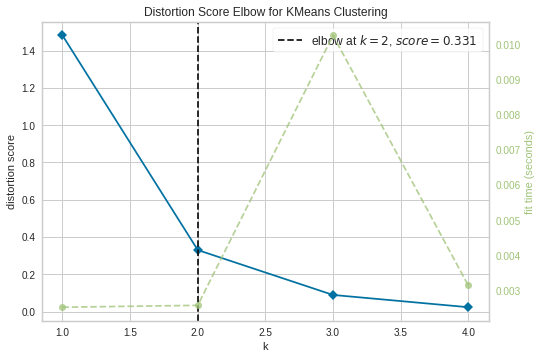

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans(n_init = 1, random_state =100)
visualizer = KElbowVisualizer(km, k=(1,5), timings=True)
visualizer.fit(x_scaled)
visualizer.show()

**Lihat, Hasil menunjukan k=2, artinya nilai 2 di sini bisa dijadikan acuan untuk jumlah kluster**

In [ ]:
# parameter n_cluster di bawah ini bisa kita isi dengan nilai dari hasil elbow method, yang mana ke-2
# KMeans(n_clusters=k, n_init="auto").fit(df_train)

## Tugas

*Gunakan data dari url ini https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv

*Hasil bisa berbeda tergantung pengolahan data, pemilihan nilai centroid diawal dan jumlah kluster

*Yang menjadi penilaian adalah proses coding dari mulai pengambilan data, pengolahan data, hingga penerapan algoritma k-means


In [2]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [3]:
order_df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")

In [4]:
order_df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
...,...,...,...,...,...,...,...,...
367,2022041468,91,NaN,31.0,52.0,31.0,46,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass


In [5]:
# Mengubah value kolom pass_test menjadi 1 = pass dan 0 = not pass agar Fungsi Kmeans dapat dijalankan
order_df["pass_test"] = np.where(order_df["pass_test"] == "not pass", 0, 1)

# Mengisi value yang NaN di kolom score menjadi 0
order_df = order_df.fillna(0)

In [6]:
# pemilihan feature
df_train = order_df.drop("npm", axis=1)
df_train

,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,99,71.0,93.0,52.0,44.0,24,0
1,96,77.0,0.0,27.0,100.0,89,1
2,86,71.0,84.0,17.0,21.0,41,0
3,81,96.0,0.0,0.0,11.0,99,0
4,93,85.0,68.0,29.0,44.0,50,0
...,...,...,...,...,...,...,...
367,91,0.0,31.0,52.0,31.0,46,0
368,96,87.0,55.0,56.0,95.0,11,1
369,569,83.0,89.0,15.0,86.0,13,0
370,84,92.0,87.0,97.0,42.0,27,1


In [7]:
n = 4
kmeans_model = KMeans(n_clusters = n, n_init = "auto", random_state = 0).fit(df_train)

In [8]:
# pelebelan cluster
order_df["kluster"] = kmeans_model.labels_
order_df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,kluster
0,2022041101,99,71.0,93.0,52.0,44.0,24,0,1
1,2022041102,96,77.0,0.0,27.0,100.0,89,1,0
2,2022041103,86,71.0,84.0,17.0,21.0,41,0,1
3,2022041104,81,96.0,0.0,0.0,11.0,99,0,0
4,2022041105,93,85.0,68.0,29.0,44.0,50,0,1
...,...,...,...,...,...,...,...,...,...
367,2022041468,91,0.0,31.0,52.0,31.0,46,0,0
368,2022041469,96,87.0,55.0,56.0,95.0,11,1,1
369,2022041470,569,83.0,89.0,15.0,86.0,13,0,3
370,2022041471,84,92.0,87.0,97.0,42.0,27,1,1


In [9]:
# hasil dari update centroid
print(kmeans_model.cluster_centers_)

[[9.00000000e+01 8.26935484e+01 1.69677419e+01 4.98790323e+01
  4.94032258e+01 4.95161290e+01 1.61290323e-01]
 [8.67456140e+01 8.46315789e+01 7.01491228e+01 4.99473684e+01
  5.62192982e+01 2.64649123e+01 3.33333333e-01]
 [9.03435115e+01 8.32824427e+01 7.03969466e+01 5.46183206e+01
  5.00305344e+01 8.10305344e+01 5.34351145e-01]
 [5.40666667e+02 8.26666667e+01 5.36666667e+01 4.40000000e+01
  6.26666667e+01 2.23333333e+01 3.33333333e-01]]


In [10]:
# standarisasi terlebih dahulu dalam bentuk array
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

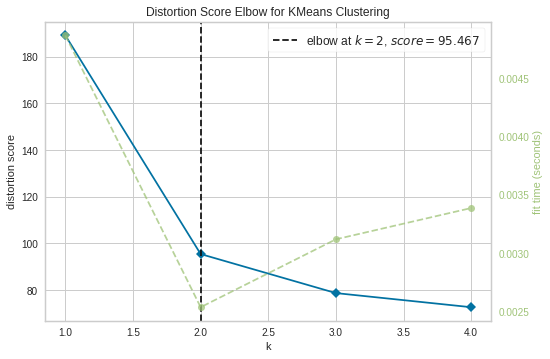

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
km = KMeans(n_init = "auto", random_state =0)
visualizer = KElbowVisualizer(km, k=(1,5), timings=True)
visualizer.fit(x_scaled)
visualizer.show()

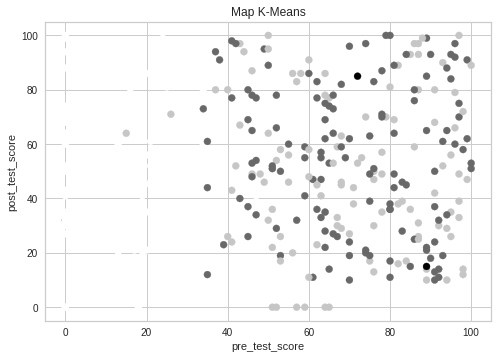

In [12]:
plt.scatter(order_df["pre_test_score"], 
            order_df["post_test_score"], 
            c = order_df["kluster"])

plt.xlabel("pre_test_score")
plt.ylabel("post_test_score")
plt.title("Map K-Means")
plt.show()

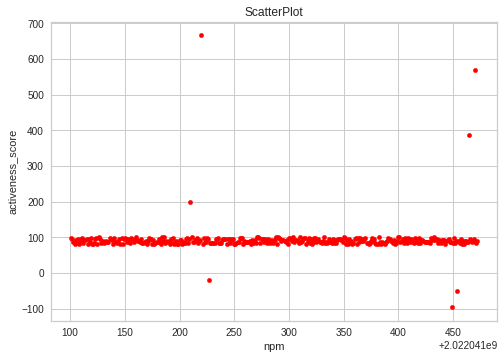

In [13]:
order_df.plot(kind = 'scatter',
        x = 'npm',
        y = 'activeness_score',
        color = 'red')
  
# set the title
plt.title('ScatterPlot')
  
# show the plot
plt.show()